### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete the Data Science Project. Some sections have been pre-filled  to help you get started. **The total mark for this task is 100**.

There are two parts in this notebook that require you to complete:

* **Part 1**: *Linear Regression* (**70 marks**)
* **Part 2**: *Classification* (**30 marks**)

Each part includes three main components:
 * **A:** Load a dataset from sklearn and examine it.
 * **B:** Build a training model and make predictions.
 * **C:** Report the results and visualize the data.

Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Project_instructions.pdf*  to know what else you need to complete for this project.

As you go through this notebook:


* markdown cells marked with **Note** mean description sections.


* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.


* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


In the end, you must execute the entire notebook and submit two files:

 1. The source of your solution notebook: **[YourID]_project_solution.ipynb**
 2. And an exported version of your output: **[YourID]_project_output.html**
       

Please proceed with the instructions for each part below to complete your tasks.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell. 

In [509]:
'''
Import packages needed for processing
'''
import numpy as np
from sklearn import datasets
import sklearn.metrics as metrics

from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

%matplotlib inline

'''
If you need add any additional packages, then add them below this line
'''
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# <span style="color:#0b486b">Part 1: Linear Regression</span>

In this part, you will be required to work on Linear Regression for the Linnerud dataset from sklearn.

The Linnerud dataset is a multi-output regression dataset. It consists of three excercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club:

physiological - containing 20 observations on 3 physiological variables:
Weight, Waist and Pulse.

exercise - containing 20 observations on 3 exercise variables:
Chins, Situps and Jumps.

## Part 1A: Load and examine the Linnerud dataset

**Instruction 1.1.** Write your code to load the **Linnerud** dataset from sklearn and assign it to a variable called `linnerud`.

[**Total mark: 3**]

In [510]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the **Linnerud** dataset from sklearn 
    and assign it to a variable called `linnerud`.
'''
linnerud =  datasets.load_linnerud()

print(linnerud.keys())


dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename'])


**Note:** `linnerud` is a dictionary with two keys: *'data'* - a numpy array containing the features and *'target'* containing the labels. The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [511]:
X = linnerud['data']
Y = linnerud['target']
feature_names_X = linnerud['feature_names']
label_names_Y = linnerud['target_names']

**Instruction 1.2.** Now you need to examine the size and structure of the dataset. 

**Your tasks are:**
1. Write your code to find and print out the number of **samples** and the number of **features** in the dataset. (1 mark)
2. Print the feature and label names for the dataset. (1 mark)

[**Total mark: 2**]

In [512]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:', len(X))
# INSERT YOUR CODE HERE


print('The number of features:', len(feature_names_X))
# INSERT YOUR CODE HERE


# 2. Print the feature and label names for the dataset.
print("Features :",feature_names_X)
print("Lable Names : ",label_names_Y)
# INSERT YOUR CODE HERE

The number of samples: 20
The number of features: 3
Features : ['Chins', 'Situps', 'Jumps']
Lable Names :  ['Weight', 'Waist', 'Pulse']


**Instruction 1.3.** We also need to get a brief understanding about the task by doing some statistics on the features and labels.

**Your tasks are:**

1. Write your code to print the **min**, **max**, **median** for each of the features. You need to use a loop in this task. (2 marks)
2. Construct a **box-plot** for each of the features. (3 marks)

3. Write your code to print the **min**, **max**, **median** for each of the labels. You need to use a loop in this task. (1 marks)
4. Construct a **box-plot** for each of the labels. (1 marks)

Do not forget to look at the feature and label names and print them in the output accordingly.

[**Total marks: 7**]

In [513]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#1. Write your code to print the min, max, median for each of the features. You need to use a loop in this task. 

def minmax(x):
    # this function fails if the list length is 0 
    minimum = maximum = x[0]
    for i in x[1:]:
        if i < minimum: 
            minimum = i 
        else: 
            if i > maximum: maximum = i
                
    
    n = len(x) 
    x.sort() 

    if n % 2 == 0: 
        median1 = x[n//2] 
        median2 = x[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = x[n//2] 
    return minimum,maximum,median

Chins = [X[i][0] for i in range(0,len(X))]
Situps = [X[i][1] for i in range(0,len(X))]
Jumps = [X[i][2] for i in range(0,len(X))]

min_Chins,max_Chins,median_Chins = minmax(Chins)
min_Situps,max_Situps,median_Situps = minmax(Situps)
min_Jumps,max_Jumps,median_Jumps = minmax(Jumps)

print("Chins: ",min_Chins,max_Chins,median_Chins)
print("Situps: ",min_Situps,max_Situps,median_Situps)
print("Jumps: ",min_Jumps,max_Jumps,median_Jumps)
# INSERT YOUR CODE HERE

Chins:  1.0 17.0 11.5
Situps:  50.0 251.0 122.5
Jumps:  25.0 250.0 54.0


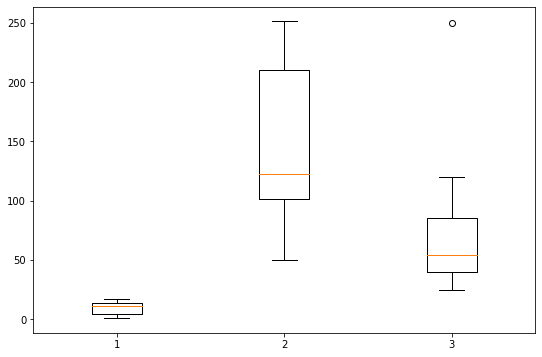

In [514]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#2. Construct a box-plot for each of the features.
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(X)
fig.savefig('fig1.png', bbox_inches='tight')
# INSERT YOUR CODE HERE

In [515]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#3. Write your code to print the min, max, median for each of the labels. You need to use a loop in this task. 
Weight = [X[i][0] for i in range(0,len(Y))]
Waist = [X[i][1] for i in range(0,len(Y))]
Pulse = [X[i][2] for i in range(0,len(Y))]

min_Weight,max_Weight,median_Weight = minmax(Weight)
min_Waist,max_Waist,median_Waist = minmax(Waist)
min_Pulse,max_Pulse,median_Pulse = minmax(Pulse)

print("Weight: ",min_Chins,max_Chins,median_Chins)
print("Waist: ",min_Situps,max_Situps,median_Situps)
print("Pulse: ",min_Jumps,max_Jumps,median_Jumps)
# INSERT YOUR CODE HERE

Weight:  1.0 17.0 11.5
Waist:  50.0 251.0 122.5
Pulse:  25.0 250.0 54.0


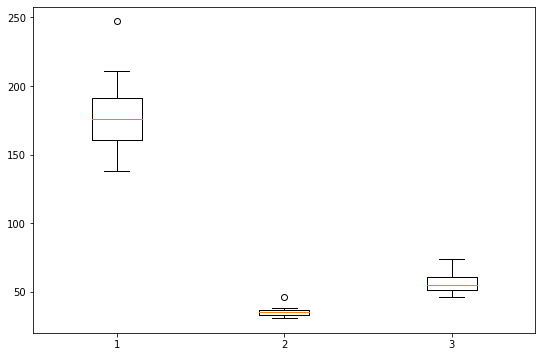

In [516]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
#4. Construct a box-plot for each of the features.
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(Y)
fig.savefig('fig2.png', bbox_inches='tight')
# INSERT YOUR CODE HERE

## Part 1B. Linear Regression

You are required to apply Linear Regression to train and make predictions on the **Linnerud** dataset.

**Note:** To perform a supervised learning task, we need to train the model on a training set of the input data and the correct labels, and predict the trained model on **unseen** data. Then, we use the correct labels of the **unseen** data to evaluate the performance of the model. The **unseen** dataset is called the **test set**.

In this part, we will be using one-dimensional linear regression using `Situps` feature and `Waist` label.

**Instruction 1.4.** First you need to split the required feature and label from the **Linnerud** dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 5**]

In [517]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
X_for_1D_LR = X[:,np.where(np.array([feature_names_X])[0] == 'Situps')[0]]
Y_for_1D_LR = Y[:,np.where(np.array([label_names_Y])[0] == 'Waist')[0]][:,0]

# first, compute the number of samples in the training set:
n_train = int(len(Y_for_1D_LR) * 0.7)

# The training set is the first n_train samples in the dataset
X_train = X_for_1D_LR[: n_train]
Y_train = Y_for_1D_LR[: n_train]

# The test set is the remaining samples in the dataset
X_test = X_for_1D_LR[n_train: ]
Y_test = Y_for_1D_LR[n_train: ]

# Print the number of samples in the training set
print('The number of samples in the training set:',len(X_train))
# INSERT YOUR CODE HERE


# Print the number of samples in the test set
print('The number of samples in the test set:',len(X_test))
# INSERT YOUR CODE HERE

The number of samples in the training set: 14
The number of samples in the test set: 6


**Instruction 1.5.** Your tasks are:
1. Create a Linear Regression model called `lr`. (5 marks)
2. Fit the training data to the model. (5 marks)

[**Total marks: 10**]

In [518]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr = linear_model.LinearRegression()

In [519]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr.fit(X_train, Y_train)
# INSERT YOUR CODE HERE

LinearRegression()

**Instruction 1.6** Predict the output of the test set.

[**Total marks: 5**]

In [520]:
Y_pred = lr.predict(X_test)
# INSERT YOUR CODE HERE

**Instruction 1.7** Construct a plot, where you will show the regression line for `Waist` vs `Situps`, the training data (use blue colour), the testing data (use green colour), and the residuals for the testing data.

[**Total marks: 5**]

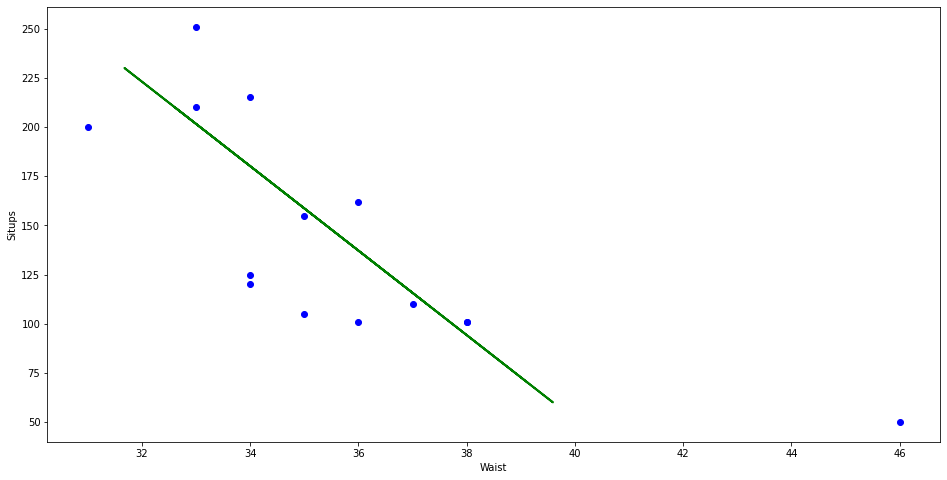

In [521]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# Construct a plot, where you will show the regression line for Waist vs Situps, the training data (use blue colour), 
# the testing data (use green colour), and the residuals for the testing data.

plt.figure(figsize=(16, 8))
plt.scatter(
    Y_train,
    X_train,
    c='blue'
)
plt.plot(
    Y_pred,
    X_test,
    c='green',
    linewidth=2
)
plt.xlabel("Waist")
plt.ylabel("Situps")
plt.show()
# INSERT YOUR CODE HERE

## Part 1C. Results

**Note:** To evaluate the performance of a Linear Regression model, two commonly used measures are **mean absolute error** and **root mean squared error**.

**mean absolute error** is defined by:

$$mean\_absolute\_error(Y_{test}, Y_{pred}) = \frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}|y_{test}^i - y_{pred}^i|$$

**root mean squared error** is defined by:

$$root\_mean\_squared\_error(Y_{test}, Y_{pred}) = \sqrt{\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}(y_{test}^i - y_{pred}^i)^2}$$


**Instruction 1.8.** Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the test set and print these two values.

[**Total marks: 8**]

**Hint:** You might need to use [Regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) from sklearn.

In [522]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute the mean absolute error between Y_test and Y_pred
# Then, print the value
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Y_pred))
# INSERT YOUR CODE HERE


# Compute the root mean squared error between Y_test and Y_pred
# Then, print the value
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
# INSERT YOUR CODE HERE


Mean Absolute Error:  2.6328834897177003
Root Mean Squared Error:  3.035947409287648


## Part 1D. More advanced modelling

**Instruction 1.9 (D, HD)** As we can see, the dataset has multi-dimensional feature vector. Previously we used only one feature to do one-dimensional linear regression model. In this task, we want to create a **two**-dimensional linear regression model for the label `Weight`. First of all, **using Pearson correlation**, we need to decide, which two of three independent variables would be best to use for Y vector in linear regression. Therefore, your tasks are:
1. Write your code to find out which two out of three variables you will be using for linear regression. (5 marks)
2. Explain your choice. (5 marks)

[**Total marks: 10**]

In [523]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# Write your code to find out which two out of three variable you will be using for linear regression.
df= pd.DataFrame(linnerud['data'],columns = linnerud['feature_names'])
cor = df.corr(method='pearson')
cor

# INSERT YOUR CODE HERE

,Chins,Situps,Jumps
Chins,1.000000,0.695727,0.495760
Situps,0.695727,1.000000,0.669206
Jumps,0.495760,0.669206,1.000000


In [524]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
print("We would be taking up Features: \"Chins\" and \"Situps\" as their correlation is closer to 1 than others.")
# INSERT YOUR COMMENT HERE

We would be taking up Features: "Chins" and "Situps" as their correlation is closer to 1 than others.


**Instruction 1.10 (D, HD)** After we have decided, which features are best to use for linear regression, we need to create training and testing data, where the feature vector is two-dimensional and the label is `Weight`. Also, we will need to compare the two-dimensional linear regression (based on two best independent variables) with on-dimensional linear regression (based on the best independent variable). Therefore, we will need to create a dataset with one-dimensional feature vector for comparison.

Your task is:
1. Create the training and testing datasets for two-dimensional linear regression. (4 marks)
2. Create the one-dimensional training and testing dataset for comparison with 2D linear regression. (1 mark)

[**Total marks: 5**]

In [525]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
df_2D= pd.DataFrame(linnerud['data'],columns = linnerud['feature_names'])[['Chins','Situps']]
# INSERT YOUR CODE HERE
weights = Y[:,np.where(np.array([label_names_Y])[0] == 'Weight')[0]][:,0]
# INSERT YOUR CODE HERE

# first, compute the number of samples in the training set:
n_train = int(len(df_2D) * 0.7)
# INSERT YOUR CODE HERE

# The training set is the first n_train samples in the dataset
X_train_2D  = df_2D[:n_train]
# INSERT YOUR CODE HERE
y_train = weights[:n_train]
# INSERT YOUR CODE HERE

# The test set is the remaining samples in the dataset
X_test_2D = df_2D[n_train:]
# INSERT YOUR CODE HERE
y_test = weights[n_train:]
# INSERT YOUR CODE HERE


#Identifying best independent variable (highest absolute coefficient value)
regressor = linear_model.LinearRegression()
regressor.fit(df_2D, weights)
coeff_df = pd.DataFrame(regressor.coef_, df_2D.columns, columns=['Coefficient'])
print(coeff_df)
# best independent variable  - Chins


# The 1D comparison dataset
df_1D = df[['Chins']]
# INSERT YOUR CODE HERE
X_train_1D = df_1D[:n_train]
# INSERT YOUR CODE HERE
X_test_1D = df_1D[n_train:]
# INSERT YOUR CODE HERE


        Coefficient
Chins     -0.422218
Situps    -0.169766


**Instruction 1.11 (D, HD)** We have the training and testing data now. Therefore, your tasks are:
1. Create a linear regression model named `lr2d`. (1 mark)
2. Fit the training data to the model. (1 mark)
3. Predict the output on the test set. (1 mark)
4. Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the test set and print these two values. (1 mark)

[**Total marks: 4**]

In [526]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr2d = linear_model.LinearRegression()
# INSERT YOUR CODE HERE

In [527]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr2d.fit(X_train_2D, y_train)
# INSERT YOUR CODE HERE

LinearRegression()

In [528]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
pred = lr2d.predict(X_test_2D)
pred
# INSERT YOUR CODE HERE

array([203.25327332, 165.29945713, 208.44333154, 162.80729498,
       157.51436979, 201.42413076])

In [529]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, pred)))
# INSERT YOUR CODE HERE

Mean Absolute Error:  148.45697625223684
Root Mean Squared Error:  149.893455822371


**Instruction 1.12 (D, HD)** Now we can compare the errors for two-dimensional linear regression with one-dimensional linear regression. Your tasks are:
1. Create a linear regression model named `lr1d_compare`. Fit the one-dimensional training data and the same labels to the model. Predict the output on the comparison dataset. (1 mark)
2. Compute **mean absolute error** and **root mean squared error** between the correct labels and the predictions of the comparison set and print these two values. (1 mark)
3. Discuss the findings and explain the result. In discussion, consider the relationships between the size of the dataset, the Pearson correlation coefficients you have calculated above, the `Weight` values and the values of errors. (4 marks)

[**Total marks: 6**]

In [530]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
lr1d_compare = linear_model.LinearRegression()
lr1d_compare.fit(X_train_1D, y_train)
pred_1D = lr1d_compare.predict(X_test_1D)
pred_1D
# INSERT YOUR CODE HERE

array([193.77854924, 176.00767404, 199.70217431, 178.96948657,
       167.12223643, 205.62579938])

In [531]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, pred_1D))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, pred_1D)))
# INSERT YOUR CODE HERE

Mean Absolute Error:  152.20098666179425
Root Mean Squared Error:  152.79489109417813


In [532]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# INSERT YOUR COMMENT HERE
# Comparing 1D and 2D models, we found that we have lower Mean Absolute Error and Root Mean squared Error values
# which implies our 2D model is somewhat better than 1D model. 

#By using Pearson correlation, We found that the correlation between Chins and Situps was highest (~0.7) and 
#closest to 1. Hence, we picked those two features for our 2D model. 
#Also, we found that Chins had the highest cofficient value hence we picked it for our 1D model.

#You can see that the value of root mean squared error is 152.79, which is very close to the mean absolute error 
#value which is 152.20. This means that our algorithm is good enough to make reasonably good predictions.

# <span style="color:#0b486b">Part 2: Classification</span>

In this part, you will be required to apply Naive Bayes algorithm for the classification task on the **breast cancer** dataset from sklearn. More about the dataset can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). 

Here, we apply Multinomial Naive Bayes for discrete features. We can construct a Multinomial Naive Bayes model by calling **naive_bayes.MultinomialNB()** from sklearn package. More about the model can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)


## Part 2A: Load and examine the dataset

**Instruction 2.1.** Write your code to load the **breast cancer** dataset from sklearn and assign it to a variable called `cancer`.

[**Total mark: 1**]

In [533]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to load the dataset from sklearn and assign it to a variable called `cancer`.
'''
cancer =  datasets.load_breast_cancer()

print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


**Note:** The cell code below assigns the data to variable `X` and the labels to variable `Y`. Run the cell and use `X` and `Y` for later tasks.

In [534]:
X = cancer['data']
Y = cancer['target']

**Instruction 2.2.** Now you need to examine the size of data. Write your code to find and print out the number of **samples** and the number of **features** in the dataset.

[**Total mark: 1**]

In [535]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to find and print out the number of **samples** 
    and the number of **features** in the dataset.
    Using variable X.
'''
print('The number of samples:', len(cancer['data']))


# INSERT YOUR CODE HERE


print('The number of features:',len(cancer['feature_names']))

# INSERT YOUR CODE HERE


The number of samples: 569
The number of features: 30


**Instruction 2.3.** The following code segment is designed to do some statistics on the labels to get a brief understanding about the prediction task. This is a classication task, it is important to know the number of categories (or number of classes) in the dataset and their frequencies.

**Your tasks are:**

1. Write your code to compute and print the number of classes in the dataset. (1 marks)
2. Write your code to compute and print the number of occurrences of each class. (3 marks)

[**Total marks: 4**]

In [536]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Write your code to compute and print the number of classes in the dataset.
    Using variable Y.
'''

num_classes = len(np.unique(Y))
# compute and print the number of classes.
# INSERT YOUR CODE HERE
print("number of classes: ",num_classes )

number of classes:  2


In [537]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Write your code to compute and print the number of occurrences of each class.
'''
# compute and print the number of occurrences of each class
# INSERT YOUR CODE HERE
(unique_elements, counts) = np.unique(Y, return_counts=True)
frequencies = np.asarray((unique_elements, counts)).T
for index,value in enumerate(frequencies):
    print('Frequency of',cancer['target_names'][index], ':',value[1])

Frequency of malignant : 212
Frequency of benign : 357


## Part 2B. Classification with Naive Bayes

You are required to apply Naive Bayes to train and make predictions on the **breast cancer** dataset.

Multinomial Naive Bayes classifier is used for discrete data. The features of the breast cancer dataset are however real values. The function below discretise the features in to 0 (low), 1 (middle) and 2 (high). Run the cell below.

In [538]:
def discretise(X):
    # for each feature, values smaller than 33% percentile are set by 0 (low), 
    # from 33% to 67% percentile are set by 1 (middle) and other are set by 2 (high).
    
    n_feats = X.shape[-1]
    X_discrete = np.zeros(X.shape)
    
    for i in range(n_feats):
        # compute val1 and val2 as the percentile of 33% and 67%, respectively of the column i
        val1, val2 = np.percentile(X[:, i], 33), np.percentile(X[:, i], 67)   
        
        # increase all discrete values by 1 for all values in X that larger than val1
        ids = np.where(X[:, i] > val1)[0]
        X_discrete[ids, i] += 1
        
        # increase all discrete values by 1 for all values in X that larger than val2
        ids = np.where(X[:, i] > val2)[0]
        X_discrete[ids, i] += 1
        
    return X_discrete


Then we call the discretise function for the feature X. Run the cell below and your data are ready for classification.

In [539]:
X = discretise(X)

**Instruction 2.4.** Similar to **Part 1**, you need to split the dataset into a training set and a test set. We will use 70% samples for training and 30% for testing. Print the number of samples in each set.

[**Total marks: 2**]

In [540]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# first, compute the number of samples in the training set:
n_train = int(len(Y) * 0.7)

# The training set is the first n_train samples in the dataset
training_data_x = X[: n_train]
# INSERT YOUR CODE HERE
training_data_y = Y[: n_train]
# INSERT YOUR CODE HERE

# The test set is the remaining  samples in the dataset
test_data_x = X[n_train: ]
# INSERT YOUR CODE HERE
test_data_y = Y[n_train:]
# INSERT YOUR CODE HERE

# Print the number of samples in the training set
print('The number of samples in the training set:', len(training_data_x))
# INSERT YOUR CODE HERE


# Print the number of samples in the test set
print('The number of samples in the test set:', len(test_data_x))
# INSERT YOUR CODE HERE

The number of samples in the training set: 398
The number of samples in the test set: 171


**Instruction 2.5.** Create a Multinomial Naive Bayes model called `mnb`.

[**Total marks: 2**]

In [541]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
mnb = MultinomialNB()
# INSERT YOUR CODE HERE

**Instruction 2.6.** Fit the training data to the model.

[**Total marks: 2**]

In [542]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
mnb.fit(training_data_x,training_data_y)
# INSERT YOUR CODE HERE

MultinomialNB()

**Instruction 2.7** Predict the output of the test set.

[**Total marks: 2**]

In [543]:
y_predict=mnb.predict(test_data_x)
# INSERT YOUR CODE HERE

## Part 2C. Results and Visualization

**Note:** To evaluate the performance of a classification task, commonly used measures are **accuracy**, **precision**, **recall** and **f1-score**.

**Instruction 2.8.** Compute the **accuracy**, **precision**, **recall** and **f1-score** of the predictions on the test set and print these values.

[**Total marks: 8**]

**Hint:** You might need to see [Classification metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) from sklearn.

In [544]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Compute and print the accuracy of predictions on the test set
accuracy_score = metrics.accuracy_score(test_data_y,y_predict)
print("accuracy score : ", accuracy_score)
# INSERT YOUR CODE HERE

# Compute and print the precision of predictions on the test set
precision_score = metrics.precision_score(test_data_y,y_predict)
print("precision score : ", precision_score)
# INSERT YOUR CODE HERE

# Compute and print the recall of predictions on the test set
recall_score = metrics.precision_score(test_data_y,y_predict)
print("recall score : ", recall_score)
# INSERT YOUR CODE HERE

# Compute and print the f1-score of predictions on the test set
f1_score = metrics.f1_score(test_data_y,y_predict)
print("f1 score : ", f1_score)
# INSERT YOUR CODE HERE

accuracy score :  0.7309941520467836
precision score :  0.9886363636363636
recall score :  0.9886363636363636
f1 score :  0.790909090909091


**Note:** We have evaluated the performance of the classification task by different measures. Now, we want to visualise the data as well as the predicted labels. [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) is a tool to convert high-dimensional data into low-dimensional ones. To visualise the data, we can use t-SNE to reduce the data dimension to 2D.

The following function `reduce_to_2D` takes the matrix X of size (n_samples, n_features) and returns a matrix of size (n_samples, 2), which is a dimension-reduced version of X. **You will need this function for a subsequent task**.

In [545]:
def reduce_to_2D(X):
    tsne = TSNE(n_components=2, random_state=1)
    new_X = tsne.fit_transform(X)
    return new_X

**Instruction 2.9**. Visualisation.

**Your tasks are:**

1. Create a variable named `X_test_2D` that is the dimension-reduced version of X_test using function `reduce_to_2D`. (4 marks)

2. Visualise `X_test_2D` using scatter() with the colors being the corresponding predicted labels. (4 marks)


[**Total mark: 8**]

In [546]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
1. Create a variable named `X_test_2D` 
    that is the dimension-reduced version of X_test using function `reduce_to_2D`.
'''

X_test_2D = reduce_to_2D(training_data_x)
# INSERT YOUR CODE HERE

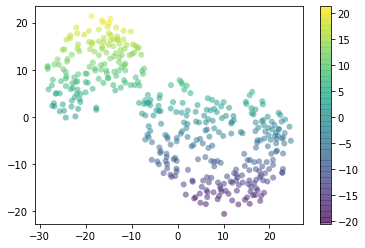

In [547]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
2. Visualise `X_test_2D` by scatters with the colors being the corresponding predicted labels.
'''

plt.scatter(X_test_2D[:,0], X_test_2D[:,1], c=X_test_2D[:,1], alpha=0.5, edgecolors='none')
plt.colorbar()
# INSERT YOUR CODE HERE